In [1]:
library(data.table)
library(dplyr)
library(ggplot2)
library(knitr)
library(stringr)
library(DT)
library(plotly)
library(arules)
library(arulesViz)
library(visNetwork)
library(igraph)
library(kableExtra)
library(RColorBrewer)

location_data = read.table(file = '../../data/nCoV2019/for_use/geographic_date.tsv', sep = '\t', header = TRUE,
                           row.names = 1)

# Change all columns to be of type "logical"
for(i in c(1:ncol(location_data))) {
    location_data[,i] <- as.logical(location_data[,i])
}

# Adjust names
names(location_data) <- gsub("X", "", names(location_data), fixed=TRUE)
names(location_data) <- gsub(".", "-", names(location_data), fixed=TRUE)

head(location_data)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Loading required package: Matrix


Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: grid

Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus


Attaching package: ‘igraph’


The following object is masked from ‘package:arules’:

    union


The following object is masked fro

,01-02-2020,01-03-2020,02-02-2020,02-03-2020,03-02-2020,03-03-2020,04-02-2020,04-03-2020,05-02-2020,05-03-2020,⋯,27-02-2020,27-03-2020,28-01-2020,28-02-2020,28-03-2020,29-01-2020,29-02-2020,29-03-2020,30-01-2020,31-01-2020
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
"Aa en Hunze, Drenthe, Netherlands",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"Aalsmeer, North Holland, Netherlands",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"Aalten, Gelderland, Netherlands",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"Abbeville County, South Carolina, United States",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"Abu Dhabi, Abu Dhabi, United Arab Emirates",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"Acadia Parish, Louisiana, United States",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


# Convert data frame to binary transaction matrix

In [2]:
location_data_transactions <- as(location_data, "transactions")
summary(location_data_transactions)

transactions as itemMatrix in sparse format with
 1615 rows (elements/itemsets/transactions) and
 72 columns (items) and a density of 0.0629085 

most frequent items:
24-03-2020 22-03-2020 23-03-2020 21-03-2020 20-03-2020    (Other) 
       554        504        476        458        426       4897 

element (itemset/transaction) length distribution:
sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
446 229 170 177 131 104  87  41  33  26  35  24  25  22  20  15  11   3   4   2 
 21  23  24 
  7   2   1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   4.529   6.000  24.000 

includes extended item information - examples:
      labels  variables levels
1 01-02-2020 01-02-2020   TRUE
2 01-03-2020 01-03-2020   TRUE
3 02-02-2020 02-02-2020   TRUE

includes extended transaction information - examples:
                         transactionID
1    Aa en Hunze, Drenthe, Netherlands
2 Aalsmeer, North Holland, Netherlands
3      Aal

# Generate rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.88    0.1    1 none FALSE            TRUE       5    0.07      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 113 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[72 item(s), 1615 transaction(s)] done [0.00s].
sorting and recoding items ... [19 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [10 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 10 rules 

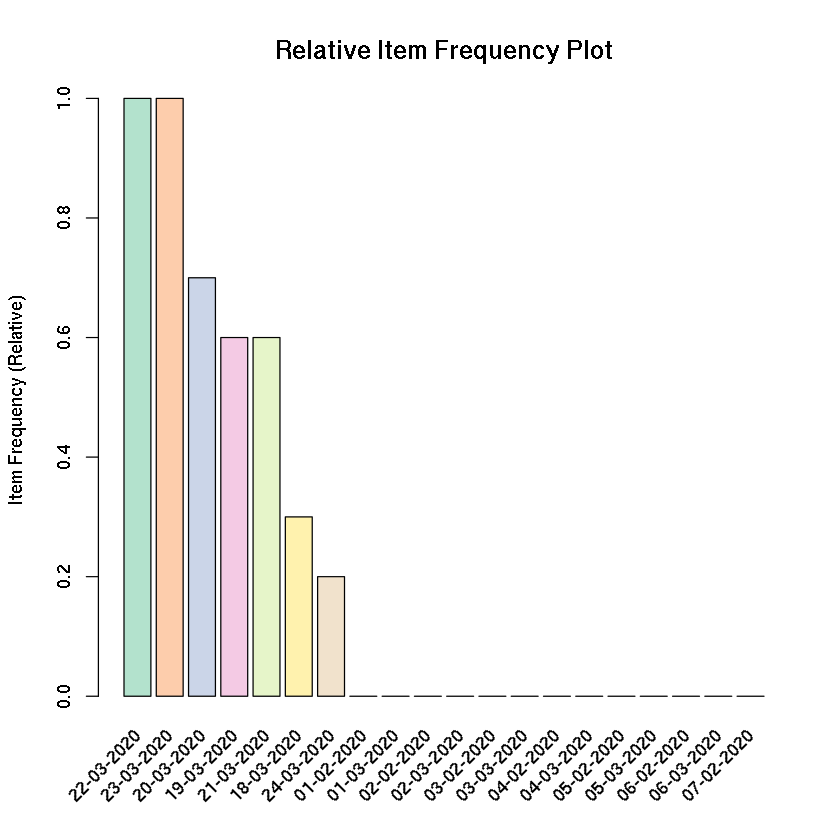

In [18]:
#data(location_data)
location_rules <- apriori(location_data_transactions, parameter=list(support=0.07, confidence=0.88))
location_rules

arules::itemFrequencyPlot(items(location_rules),
    topN=20,
    col=brewer.pal(8,'Pastel2'),
    main='Relative Item Frequency Plot',
    type="relative",
    ylab="Item Frequency (Relative)")

# Scatterplot

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



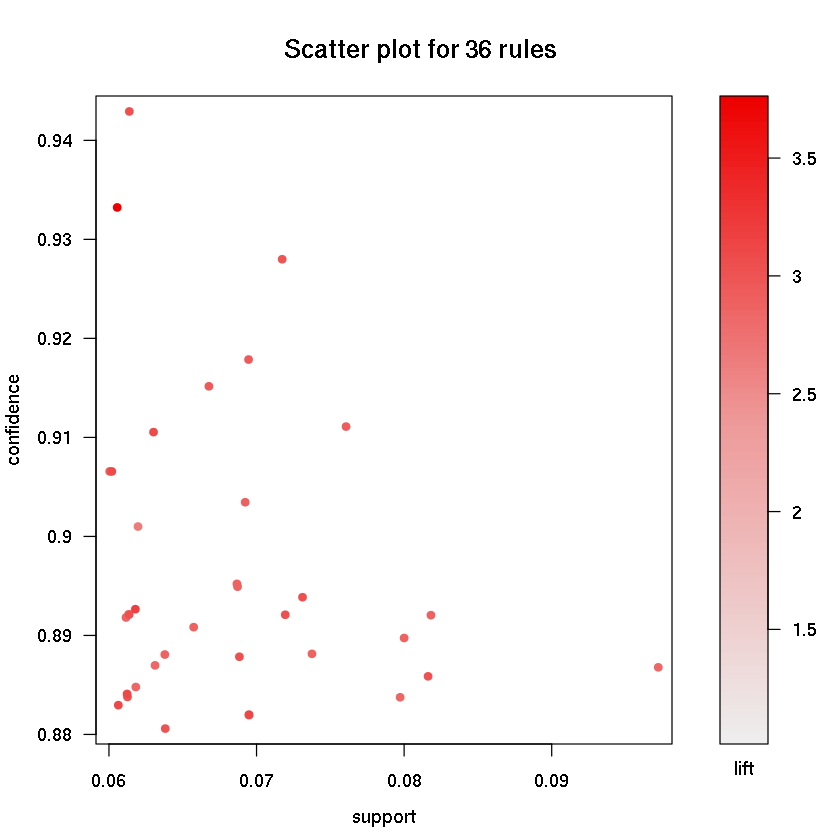

In [17]:
plot(location_rules)

# Graph of sample of dates/locations

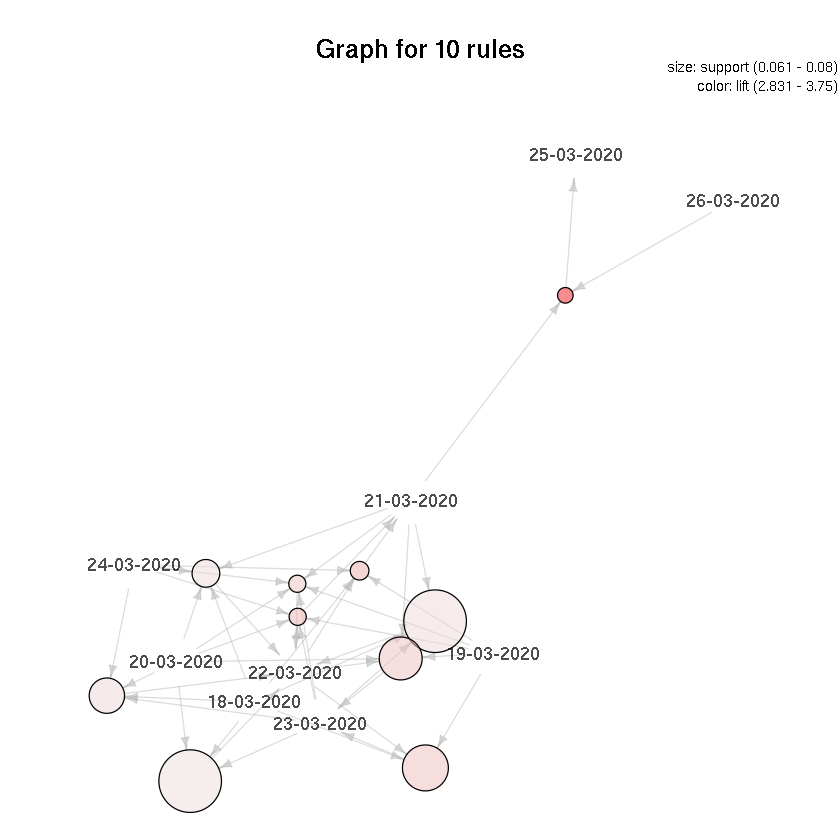

In [15]:
location_rules_sample <- sample(location_rules, 10)
plot(location_rules_sample, method="graph")

# Graph of full set of rules

pdf 
  3

png 
  2

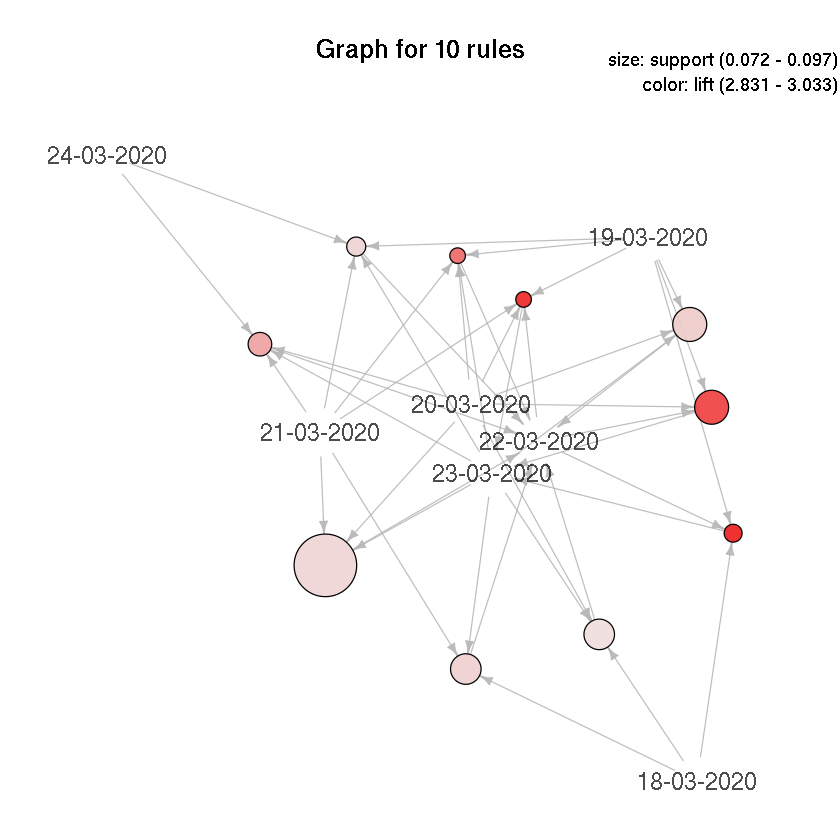

In [34]:
set.seed(4)
plot(location_rules, method="graph", cex=1.3, measure="support", shading="lift", alpha=0.9)
dev.copy(pdf, "geo-date-rules.pdf")
dev.off()

# Interactive viz

In [37]:
set.seed(11)
p <- plot(location_rules, method="graph", measure="support", shading="confidence", engine="htmlwidget")
htmlwidgets::saveWidget(p, "geo-date-rules.html", title="Rules generated from COVID-19 Dates divided up by Geographic region",
                        selfcontained = TRUE)
p

HTML widgets cannot be represented in plain text (need html)